# Anomaly Detection

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(context="notebook", style="darkgrid", palette="dark")

In [3]:
data = loadmat('data/ex8data1.mat')

Loading Traing set and Validation set

In [4]:
X = data['X']
Xval = data['Xval']
Yval = data['yval']

As we can see it looks like a gaussian distrbtuion

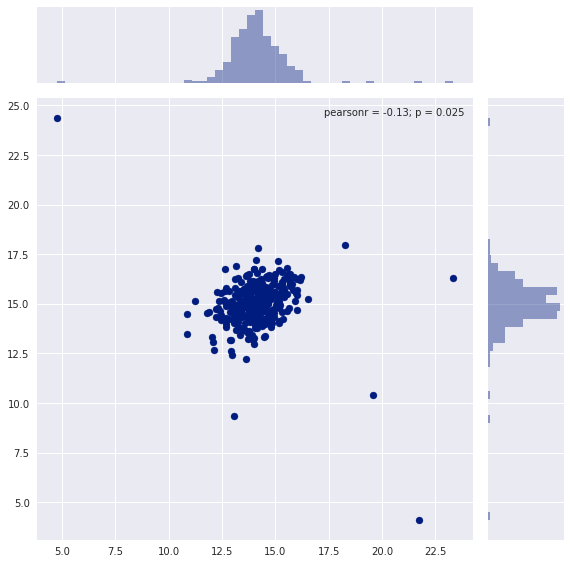

In [7]:
j = sns.jointplot(X[:,0], X[:,1], size=8)

In [35]:
def estimateGaussian(X):
    mean_X = np.sum(X, axis = 0)/len(X)
    std_X_2 = np.sum(np.square(X - mean_X), axis = 0)/len(X)
    return [mean_X, std_X_2]

In [36]:
[mu, sigma2] = estimateGaussian(X)

Iterating over Epsilon for optimal Value

In [37]:
def select_Threshold(Pval, Yval):
    best_epsilon = 0
    best_F1 = 0
    move = (Pval.max() - Pval.min())/1000
    
    for epsilon in np.arange(Pval.min(), Pval.max(), move):
        pred = (Pval < epsilon).astype(int)
        
        tp = np.sum(np.logical_and(pred == 1, Yval == 1).astype(float))
        fp = np.sum(np.logical_and(pred == 1, Yval == 0).astype(float))
        fn = np.sum(np.logical_and(pred == 0, Yval == 1).astype(float))
        
        prec = tp/(tp + fp)
        rec = tp/(tp + fn)
        F1 = (2 * prec * rec)/ (prec + rec)
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return [best_epsilon, best_F1]
        

Using scipy package to get Probability distribution of validation set

In [38]:
from scipy import stats
Pval = stats.norm(mu, sigma2).pdf(Xval)

Geting optimal value of epsilon using validation set

In [39]:
[epsilon, F1_score] = select_Threshold(Pval, Yval)
[epsilon, F1_score]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


[0.0095667060059568421, 0.7142857142857143]

Getting pd from the training set

In [40]:
P = stats.norm(mu, sigma2).pdf(X)

where returns the row index and column index from the given condition

In [41]:
out = np.where(P < epsilon)
out

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

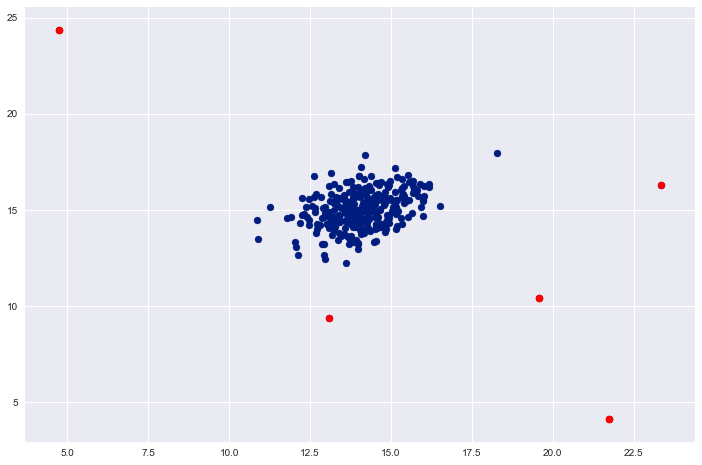

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[out[0],0], X[out[0],1], s=50, color='r', marker='o')

Hence using anomaly detection we found 5 anomalies